# Motivation for telling this Story

I am currently transitioning into a new career officially and no doubt, I am caught in the line of fire being a job seeker. I am sure everyone seeking a job might have asked questions like "how many applications do I need to submit before landing a job?" "How many interviews do I need to attend before receiving a job offer?" and "how long would my job serch take?" These three questions are common among job seekers. So on this data storytelling exercise, I will tell a story of job seekers that partnered with Pathrise company. The job seekers in this story will be called "fellows". The word "placed" means the fellow landed a job. "placed" will be denoted by 1. "Non-placed" means the fellow didn't land a job, and will be denoted with 0. Each fellow in this story were given equal amount of time(one year) to land a job.

# Overview of Pathrise


Pathrise is an online program that provides 1-on-1 mentorship, training, and advice to help job seekers get the best possible jobs in tech. Every two weeks, Pathrise welcomes a new cohort of fellows. If a candidate is interested in joining our program and successfully passes all stages of our admission process, they receive an offer to join Pathrise and become a fellow. The first 2 weeks in the program are called a free trial period and a fellow can withdraw within this free trial period without any penalty. After 2 weeks, a fellow needs to sign an ISA (Income Share Agreement) with us if they want to stay in the program. The entire program lasts up to a year, including 8 weeks of the core curriculum. If a fellow is unable to find a job within a year after joining Pathrise, his/her contract is terminated. However, there might be some exceptions. For instance, if someone was on a break, we may extend their contract for the period of the break.

On average, for fellows who stay with us after their free trial period, it takes about 4 months to receive a final job offer. However, there is a lot of variation in fellows’ outcomes. Being able to predict how fast every single fellow is going to find a job is crucial for our business.

Importing neccesary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import os

Loading the dataset by Pathrise

In [3]:
df= pd.read_csv("Data_Pathrise.csv")

What is in the data provided?

In [4]:
df.head(5) # This will help us see the first 5 rows of the dataset

,id,company_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


The id column seems to be just an idex. There at least two NAN values in program_duration_days. Lets see how many of the data is missing. Check all columns to be safe

In [5]:
#count the number of missing values
miss_value = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
miss_value.columns=['count', '%']
miss_value.sort_values(by=['%'],ascending=False)

,count,%
program_duration_days,616,24.213836
gender,492,19.339623
work_authorization_status,284,11.163522
employment_status,229,9.001572
professional_experience,222,8.726415
number_of_interviews,218,8.569182
length_of_job_search,74,2.908805
highest_level_of_education,58,2.279874
biggest_challenge_in_search,24,0.943396
race,18,0.707547


None of the columns has missing values above 25%.

# How often fellows at Pathrise are placed

In [6]:
df_placed = df.groupby([df['placed'] == 1, df['placed'] == 0]).size().unstack(fill_value=0)
df_placed

placed,False,True
placed,,
False,0,1588
True,956,0


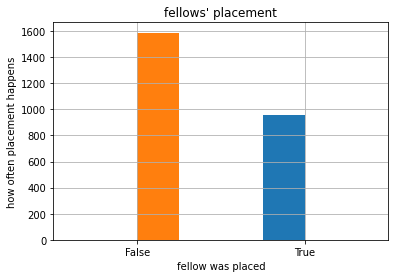

In [7]:
ax = df_placed.plot.bar(rot=0, grid = 'on', ylabel ='how often placement happens', 
                                  xlabel = 'fellow was placed', title = "fellows' placement")
ax.get_legend().remove()

From the plot above, not every fellow was placed. Out of the 2544 total fellows in the program, only 956 were placed. That's only 37.6%. This percentage is taking into account rows with missing values. We should know that rows with missing values could be as a result of many factors. One could be because a fellow isn't placed yet and probably still active in the program. Let's drop missing rows with values and see how the result is affected.

In [8]:
Placed_without_Missing_Values=df.dropna(axis = 0, how ='any')

In [9]:

Placed_without_Missing_Values = Placed_without_Missing_Values.groupby([Placed_without_Missing_Values['placed'] == 1, Placed_without_Missing_Values['placed'] == 0]).size().unstack(fill_value=0)
display(Placed_without_Missing_Values)

placed,False,True
placed,,
False,0,487
True,501,0


The number of fellows placed droped from 956 to 501. That's 52% decrease for placed fellows, but 97% overall for placement. The non-placed fellow number went down from 1588 to 487, that's 30% decrease compare to about 62% when missing values were not removed. This means that majority of non-placed fellows had missing info which could mean inactive or some sort of status with Pathrise.

# Each column on the dataset is vital, hence lets see how each column compares with placement. 

Let's see how many times Pathrise classifies a fellow as placed.

In [10]:
placed = df[df['placed'] == 1].groupby("company_status").size()
non_placed = df[df['placed'] == 0].groupby("company_status").size()
status_and_placement = pd.concat([placed, non_placed], axis = 1)
status_and_placement.head()

,0,1
company_status,,
Placed,956.0,NaN
Active,NaN,532.0
Break,NaN,32.0
Closed Lost,NaN,182.0
Deferred,NaN,34.0


I need to rename the columns 0 as placed and 1 as non_placed

In [11]:
status_and_placement =status_and_placement.rename(columns = {0: "placed",1: "non-placed"})
status_and_placement

,placed,non-placed
company_status,,
Placed,956.0,NaN
Active,NaN,532.0
Break,NaN,32.0
Closed Lost,NaN,182.0
Deferred,NaN,34.0
MIA,NaN,52.0
Withdrawn,NaN,398.0
Withdrawn (Failed),NaN,82.0
Withdrawn (Trial),NaN,276.0


Visualizing pathrise status

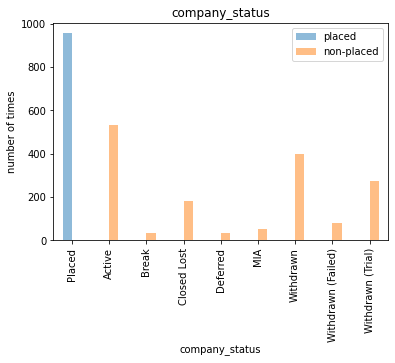

In [12]:
ax = status_and_placement.plot.bar(alpha=0.5, title ='company_status', ylabel='number of times')

From the plot above, Pathrise have alot of active and withdrawn fellows whih could explain the difference in result when i droped rows with missing values.

# How long does placed fellows stay with Pathrise before placement?

To best answer this questions, I will use the info provided in program_duration_days column and company status column.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Active'),
  Text(1, 0, 'Closed Lost'),
  Text(2, 0, 'Placed'),
  Text(3, 0, 'Withdrawn (Failed)'),
  Text(4, 0, 'Withdrawn (Trial)'),
  Text(5, 0, 'Withdrawn'),
  Text(6, 0, 'Deferred'),
  Text(7, 0, 'Break'),
  Text(8, 0, 'MIA')])

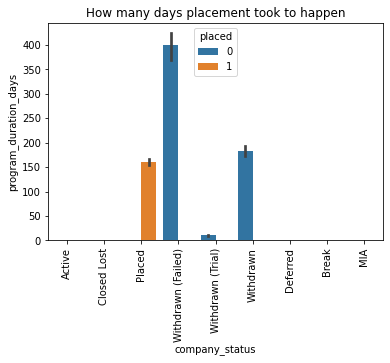

In [13]:
ax = sns.barplot(data=df, y = 'program_duration_days',x= 'company_status', hue = 'placed')
ax.set_title("How many days placement took to happen")
plt.xticks(rotation=90)

Here we see that it took ideally about 160 days for a fellow to be placed. This is approximately 5 months. Fellows who decided to sit it out after the 160 days either withdrew or ran out of time waiting for placement at 400 days. Those fellows are then classified as failed.

# Type of work authorization the placed fellow have

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Canada Citizen'),
  Text(1, 0, 'Citizen'),
  Text(2, 0, 'F1 Visa/OPT'),
  Text(3, 0, 'Green Card'),
  Text(4, 0, 'F1 Visa/CPT'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'STEM OPT'),
  Text(7, 0, 'Not Authorized'),
  Text(8, 0, 'H1B')])

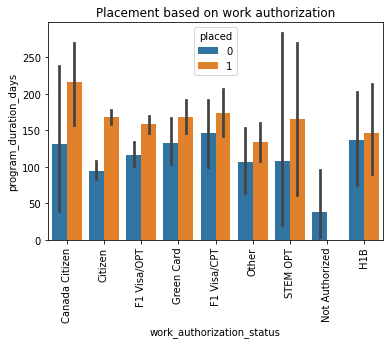

In [14]:
ax = sns.barplot(data=df, y = 'program_duration_days',x= 'work_authorization_status', hue = 'placed')
ax.set_title("Placement based on work authorization")
plt.xticks(rotation=90)

Looking at the above plot, we see that it took Canada citizens more days to land a job compare to American citizens. Fellows with STEMP OPT, H1B, and Green Card spent the ideal time in the program before landing a job. Fellows with work authorization classified as others spent less time in program. They are also more likely to placed before 150 days. They have lowest program days after fellows with no work authorization. Another take away here is that Canadan Citizens tends to stick around till the end of the program compared to others.

# Placement based on Gender

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Male'),
  Text(1, 0, 'Female'),
  Text(2, 0, 'Decline to Self Identify'),
  Text(3, 0, 'Non-Binary')])

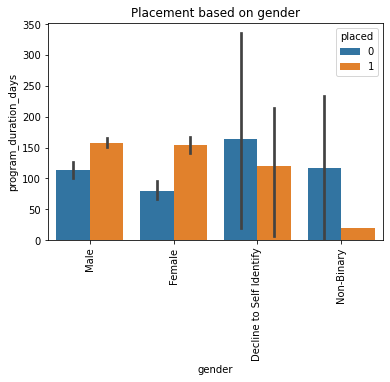

In [15]:
ax = sns.barplot(data=df, y = 'program_duration_days',x= 'gender', hue = 'placed')
ax.set_title("Placement based on gender")
plt.xticks(rotation=90)

The numbers of self identified male and female in the program who were placed were about the same. Males had the high rejection rate compared to females. Fellows who identified as Non-Binary has the highest rejection rate. 

# Placement based on Length of Job Search

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Less than one month'),
  Text(1, 0, '1-2 months'),
  Text(2, 0, '3-5 months'),
  Text(3, 0, '6 months to a year'),
  Text(4, 0, 'Over a year')])

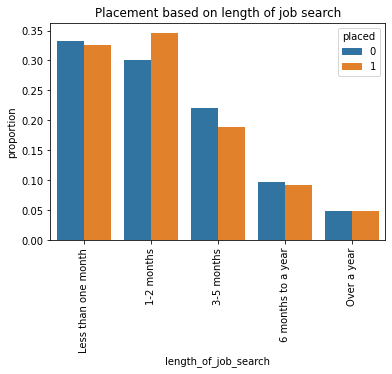

In [16]:
x, y, hue = 'length_of_job_search', 'proportion', "placed"
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
plt.title("Placement based on length of job search")
plt.xticks(rotation=90)

This plot just confirmed that the ideal number for landing a job with Pathrise is about 160 days(3-5months on the plot) with losts of non-placed who withdrew. Something interesting to note here is that as a fellow crosses the 3-5 months mark, the number of non-placed starts stabilizing and matching the number placed fellows. This means that a fellow who will stays till the end of the program only have 50% chance of being placed compare to a fellow is currently spending 1 to 2 months. As fellows cross 2 months in the program, their chances of being classified as non-placed increases significantly before stabilizing after 6 months.

# Placement based on level of education

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, "Bachelor's Degree"),
  Text(1, 0, "Master's Degree"),
  Text(2, 0, 'Some College, No Degree'),
  Text(3, 0, 'Doctorate or Professional Degree'),
  Text(4, 0, 'Some High School'),
  Text(5, 0, 'GED or equivalent'),
  Text(6, 0, 'High School Graduate')])

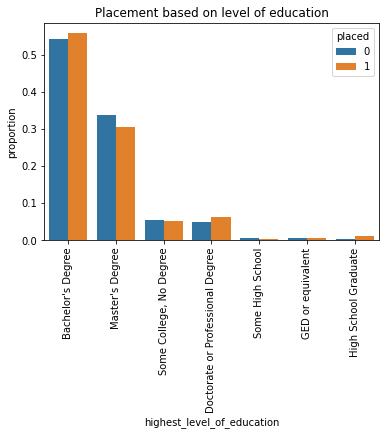

In [17]:
x, y, hue = 'highest_level_of_education', 'proportion', "placed" 
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
plt.title("Placement based on level of education")
plt.xticks(rotation=90)


Majority of the fellows have Bachelor's degree and more likely to be placed, follwed by Doctorate's degree and then High school graduates. Fellows with GED had 50-50 chance. 

# Placement based on primary track

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'SWE'),
  Text(1, 0, 'PSO'),
  Text(2, 0, 'Design'),
  Text(3, 0, 'Data'),
  Text(4, 0, 'Web'),
  Text(5, 0, 'Marketing')])

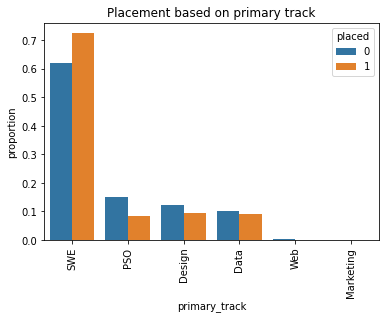

In [18]:
x, y, hue = 'primary_track', 'proportion', "placed" 
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
plt.title("Placement based on primary track")
plt.xticks(rotation=90)


Fellows on SWE were more likely to be placed. PSO track has the highest non-placement rate followed by Design and Data.

# Placement based on Biggest Challenge during job search

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Hearing back on my applications'),
  Text(1, 0, 'Technical interviewing'),
  Text(2, 0, 'Getting past final round interviews'),
  Text(3, 0, 'Lack of relevant experience'),
  Text(4, 0, 'Getting past mid-stage interviews'),
  Text(5, 0, 'Figuring out which jobs to apply for'),
  Text(6, 0, 'Getting past phone screens'),
  Text(7, 0, 'Behavioral interviewing'),
  Text(8, 0, 'Resume gap'),
  Text(9, 0, 'Technical skills')])

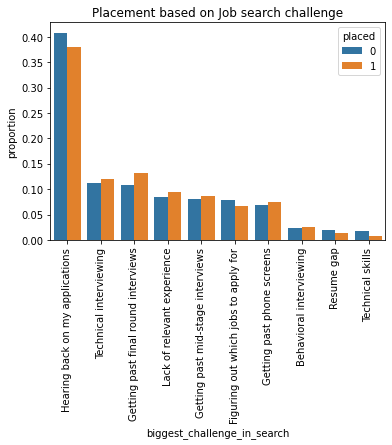

In [19]:
x, y, hue = 'biggest_challenge_in_search', 'proportion', "placed" 
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
plt.title("Placement based on Job search challenge")
plt.xticks(rotation=90)


Fellows who reported having trouble hearing back on their application had the highest proportion of placed and also more likely not to be placed. Successful fellow were more likely to report Getting past final round of interview as one of their issues. Fellows who were having trouble figuring out which job to apply to were more likely to be placed. Lack of technical skills and resume gap  are good indicator of a fellow who would have a hard time being placed according to the plot.

# Placement based on Professional Experience

<Figure size 576x144 with 0 Axes>

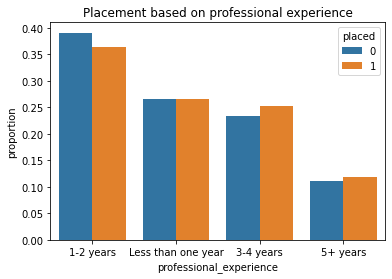

<Figure size 576x144 with 0 Axes>

In [20]:
x, y, hue = 'professional_experience', 'proportion', "placed" 
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
plt.title("Placement based on professional experience")
plt.figure(figsize=(8, 2))
#plt.xticks(rotation=90)


From the plot, we see that fellows that goes through Pathrise are mostly in their early career. The chances of being classified as non-placed were very low for fellows with 5+ years of experience. Majority of fellows at Pathrise only have 0-2 years experience. Fellows with 3+ years experience had better placement rate compared to 5+ years and fellow with less than one year of experience. 

# Conclusion

It is very hard to pin point one factor that affects fellows' placement. All the factors considered aboved seemed to be important and should be taken seriously. The dataset didn't give clues about fellows motivation or other personaly reasons that could have impacted their placements. To end this datastory telling, I will visualize the number of applications, interviews fellows got and how it correlates to the chances of fellows being placed. 

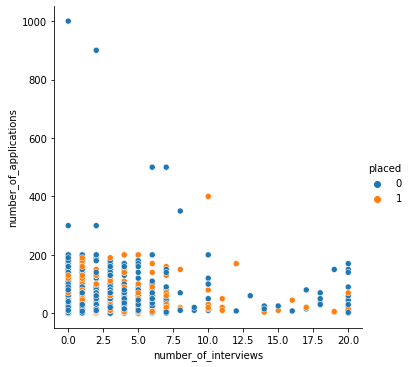

In [21]:
sns.relplot(y='number_of_applications', x="number_of_interviews", hue="placed", data=df)

As we see here that there were fellows who turned in upto 1000 applications and still didn't get a job. From the plot, it is quite obvious that the most placed fellows only turned in max of about 400 applications and got a job on their 11th interview approximately. Job search is completed and no one factor could be said to be the reason why a fellow didn't get a job. 

# Recommendations

1. I would recommend Pathrise tracks number of connects each fellows make. Networking seems to be one of the helping factors for landing a job.

2. There was no information on the quality of resume each fellow used during the program. I would recommend Pathrise creates a tracking system for resume quality. from my experience some career coaching entities hardly know about quality of resume content. They only help job seekers with formating.

3. Provide one-on-one mentor would go over fellows' resume before they submit it for job application. Sounds like a hard job but it will help increase the 38% of placement as we saw on earlier. 